In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import matplotlib.patches as patches


##################머신러닝 모듈 ################

from sklearn.model_selection import train_test_split #사이킷런 import
from sklearn.linear_model import LinearRegression

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)


In [2]:
#와인 등급 예측하기

file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv"

data = pd.read_csv(file_url)

data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [4]:
data.info(show_counts = True) # Non-Null Count 보이도록 출력 ==> 결측치 있는지 판단

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [5]:
round(data.describe(), 2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
std,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00


In [6]:
data.drop(['first' , 'last' , 'street', 'city' , 'state' , 'zip' , 'trans_num' , 'unix_time' , 'job' , 'merchant'] , axis = 1 , inplace =True)

In [7]:
data['trans_date_trans_time']

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1852389    2020-12-31 23:59:07
1852390    2020-12-31 23:59:09
1852391    2020-12-31 23:59:15
1852392    2020-12-31 23:59:24
1852393    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [8]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time']) # 날짜 형식으로 변환

data['trans_date_trans_time']

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1852389   2020-12-31 23:59:07
1852390   2020-12-31 23:59:09
1852391   2020-12-31 23:59:15
1852392   2020-12-31 23:59:24
1852393   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: datetime64[ns]

In [9]:
data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0


In [10]:
data.groupby('cc_num').count()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
cc_num,,,,,,,,,,,
60416207185,2196,2196,2196,2196,2196,2196,2196,2196,2196,2196,2196
60422928733,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200
60423098130,738,738,738,738,738,738,738,738,738,738,738
60427851591,743,743,743,743,743,743,743,743,743,743,743
60487002085,735,735,735,735,735,735,735,735,735,735,735
...,...,...,...,...,...,...,...,...,...,...,...
4958589671582726883,2191,2191,2191,2191,2191,2191,2191,2191,2191,2191,2191
4973530368125489546,1467,1467,1467,1467,1467,1467,1467,1467,1467,1467,1467
4980323467523543940,736,736,736,736,736,736,736,736,736,736,736


In [11]:
amt_info = data.groupby('cc_num').agg(['mean' , 'std'])['amt'].reset_index() #cc_num별 amt 평균과 표준편차 계산

amt_info.head()

,cc_num,mean,std
0,60416207185,59.257796,142.869746
1,60422928733,65.483159,92.042844
2,60423098130,96.376084,1000.693872
3,60427851591,107.487550,131.014534
4,60487002085,64.096925,153.207660


In [12]:
data = data.merge(amt_info , on = 'cc_num' , how = 'left') # 데이터 합치기
data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,89.408743,127.530101
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,69.924272,116.688602
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,80.090040,280.077880
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,95.341146,94.322842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,62.347968,110.821153
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,50.452289,168.361122
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,88.704297,119.948793
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,60.998052,89.525640


In [13]:
data['amt_z_score'] = (data['amt'] - data['mean']) / data['std']  # z-score 계산

In [14]:
data[['amt' , 'mean' , 'std' , 'amt_z_score']].head()

,amt,mean,std,amt_z_score
0,4.97,89.408743,127.530101,-0.662108
1,107.23,56.078113,159.201852,0.321302
2,220.11,69.924272,116.688602,1.287064
3,45.00,80.090040,280.077880,-0.125287
4,41.96,95.341146,94.322842,-0.565941


In [15]:
data.drop(['mean' , 'std'] , axis = 1 , inplace =True)  # 변수 제거

In [16]:
data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,-0.167639
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,-0.592099


In [17]:
category_info = data.groupby(['cc_num' , 'category']).agg(['mean' , 'std'])['amt'].reset_index()

In [18]:
data = data.merge(category_info , on = ['cc_num' , 'category'] , how = 'left')

data['cat_z_score'] = (data['amt'] - data['mean']) / data['std']

data.drop(['mean' , 'std'] , axis = 1 , inplace =True)

data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,-0.167639,-0.047862
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,-0.592099,-0.007423


In [20]:
# !pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org  geopy

     -------------------------------------- 119.8/119.8 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import geopy.distance

data['merch_coord'] = pd.Series(zip(data['merch_lat'] , data['merch_long'])) # 위도, 경도 한 변수로 합치기

data['cust_coord'] = pd.Series(zip(data['lat'] , data['long'])) # 위도, 경도 한 변수로 합치기

data


,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)"
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)"
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)"
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)"
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,-0.167639,-0.047862,"(39.946837, -91.333331)","(40.4931, -91.8912)"
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822,"(29.661049, -96.186633)","(29.0393, -95.4401)"
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137,"(46.65834, -119.715054)","(46.1966, -118.9017)"
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,-0.592099,-0.007423,"(44.470525, -117.080888)","(44.6255, -116.4493)"


In [22]:
data['distance'] = data.apply(lambda x : geopy.distance.distance(x['merch_coord'] , x['cust_coord']).km , axis =1 ) # 거리계산

data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)",108.102912
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.685115
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.702395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,-0.167639,-0.047862,"(39.946837, -91.333331)","(40.4931, -91.8912)",77.032467
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822,"(29.661049, -96.186633)","(29.0393, -95.4401)",100.023736
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137,"(46.65834, -119.715054)","(46.1966, -118.9017)",80.887812
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,-0.592099,-0.007423,"(44.470525, -117.080888)","(44.6255, -116.4493)",53.060882


In [ ]:
# import time
#
# start_time = time.time()
# data['distance'] = data.apply(lambda x : geopy.distance.distance(x['merch_coord'] , x['cust_coord']).km , axis =1 ) # 거리계산
# end_time = time.time()
#
# print(end_time - start_time)

In [23]:
distance_info = data.groupby('cc_num').agg(['mean' , 'std'])['distance'].reset_index() # cc_num 별, 거리 정보 계산

data = data.merge(distance_info , on = 'cc_num' , how = 'left') # 데이터 합치기

data['distance_z_score'] = (data['distance'] - data['mean']) / data['std'] # z-score 계산

data.drop(['mean' , 'std'] , axis =1 , inplace = True) # 변수 제거

data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance,distance_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821,0.030974
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618,-1.475224
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)",108.102912,1.160572
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.685115,0.818063
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.702395,0.064037


In [24]:
data['age'] = 2021 - pd.to_datetime(data['dob']).dt.year # dt.year 활요한 나이 계산

data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance,distance_z_score,age
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821,0.030974,33
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618,-1.475224,43
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)",108.102912,1.160572,59
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.685115,0.818063,54
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.702395,0.064037,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,-0.167639,-0.047862,"(39.946837, -91.333331)","(40.4931, -91.8912)",77.032467,0.052081,55
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822,"(29.661049, -96.186633)","(29.0393, -95.4401)",100.023736,0.693848,22
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137,"(46.65834, -119.715054)","(46.1966, -118.9017)",80.887812,0.288293,40
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,-0.592099,-0.007423,"(44.470525, -117.080888)","(44.6255, -116.4493)",53.060882,-0.730061,56


In [25]:
data = pd.get_dummies(data, columns = ['category' , 'gender'] , drop_first= True)

data

,trans_date_trans_time,cc_num,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2019-01-01 00:00:18,2703186189652095,4.97,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,...,0,0,0,1,0,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,220.11,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,...,0,0,0,0,0,0,0,0,0,1
3,2019-01-01 00:01:16,3534093764340240,45.00,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,...,0,0,0,0,0,0,0,0,0,1
4,2019-01-01 00:03:06,375534208663984,41.96,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,43.77,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,...,1,0,0,0,0,0,0,0,0,1
1852390,2020-12-31 23:59:09,3556613125071656,111.84,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,...,0,0,1,0,0,0,0,0,0,1
1852391,2020-12-31 23:59:15,6011724471098086,86.88,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,...,0,0,1,0,0,0,0,0,0,0
1852392,2020-12-31 23:59:24,4079773899158,7.99,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,...,0,0,0,0,0,0,0,0,1,1


In [43]:
data.set_index('trans_date_trans_time' , inplace =True)

data.head()

KeyError: "None of ['trans_date_trans_time'] are in the columns"

In [44]:
data.drop(['cc_num' , 'lat' , 'long' , 'merch_lat' , 'merch_long' , 'dob' , 'merch_coord' , 'cust_coord'] , axis =1 , inplace = True)

In [45]:
train = data[data.index < '2020-07-01'] # 훈련셋 설정
test = data[data.index >= '2020-07-01'] # 시험셋 설정


len(test) / len(data) # 시험셋 비율 확인

0.284

In [46]:
X_train = train.drop('is_fraud' , axis =1)
X_test = test.drop('is_fraud' , axis = 1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [47]:
X_train

,amt,city_pop,amt_z_score,cat_z_score,distance,distance_z_score,age,category_food_dining,category_gas_transport,category_grocery_net,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,4.97,3495,-0.662108,-0.688297,78.773821,0.030974,33,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2019-01-01 00:00:44,107.23,149,0.321302,0.317631,30.216618,-1.475224,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:00:51,220.11,4154,1.287064,2.872509,108.102912,1.160572,59,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01 00:01:16,45.00,1939,-0.125287,-1.050197,95.685115,0.818063,54,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01 00:03:06,41.96,99,-0.565941,1.312866,77.702395,0.064037,35,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 23:59:22,1.76,2036,-0.333307,-0.330121,102.779991,0.960234,50,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-06-30 23:59:26,102.23,4913,0.294371,0.548342,41.174431,-1.256779,55,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2020-06-30 23:59:45,5.81,8874,-0.358329,-0.168437,82.348097,0.171135,21,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
X_test

,amt,city_pop,amt_z_score,cat_z_score,distance,distance_z_score,age,category_food_dining,category_gas_transport,category_grocery_net,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2020-07-01 00:00:08,53.44,2135,-0.112832,-0.455810,42.578590,-1.123830,17,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-01 00:02:53,57.10,269,-0.032779,-0.165846,19.004275,-1.969825,56,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-01 00:05:33,104.43,3994,0.180533,0.320727,84.991661,0.299902,85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-01 00:09:34,47.19,184,-0.136398,-0.869670,27.175588,-1.720316,76,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-01 00:11:33,1.51,757530,-0.508999,-0.240157,74.312862,-0.015261,55,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:59:07,43.77,519,-0.167639,-0.047862,77.032467,0.052081,55,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2020-12-31 23:59:09,111.84,28739,0.364619,1.163822,100.023736,0.693848,22,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2020-12-31 23:59:15,86.88,3684,-0.015209,0.440137,80.887812,0.288293,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
y_train

trans_date_trans_time
2019-01-01 00:00:18    0
2019-01-01 00:00:44    0
2019-01-01 00:00:51    0
2019-01-01 00:01:16    0
2019-01-01 00:03:06    0
                      ..
2020-06-30 23:59:22    0
2020-06-30 23:59:26    0
2020-06-30 23:59:45    0
2020-06-30 23:59:50    0
2020-06-30 23:59:50    0
Name: is_fraud, Length: 1326733, dtype: int64

In [50]:
y_test

trans_date_trans_time
2020-07-01 00:00:08    0
2020-07-01 00:02:53    0
2020-07-01 00:05:33    0
2020-07-01 00:09:34    0
2020-07-01 00:11:33    0
                      ..
2020-12-31 23:59:07    0
2020-12-31 23:59:09    0
2020-12-31 23:59:15    0
2020-12-31 23:59:24    0
2020-12-31 23:59:34    0
Name: is_fraud, Length: 525661, dtype: int64

In [51]:
# !pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org  lightgbm

In [53]:
import lightgbm as lgb

model_1 = lgb.LGBMClassifier(random_state= 100) # 모델 객체 생성
model_1.fit(X_train , y_train)
pred_1 = model_1.predict(X_test) # 예측

In [57]:
pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_auc_score
# 정확도 점수 , 혼동 행렬 , 분류 리포트 , ROC AUC 점수

accuracy_score(y_test , pred_1) # 정확도 확인

0.9970760623291437

In [55]:
print(confusion_matrix(y_test , pred_1)) # 혼동 행렬

[[522933    716]
 [   821   1191]]


In [56]:
print(classification_report(y_test , pred_1)) # 분류 리포트 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.62      0.59      0.61      2012

    accuracy                           1.00    525661
   macro avg       0.81      0.80      0.80    525661
weighted avg       1.00      1.00      1.00    525661



In [58]:
pred_1 # 이진 분류에 따라 기준점에 따른 0과 1로 구분

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
proba_1 = model_1.predict_proba(X_test) # 예측

proba_1

array([[1.000e+00, 3.122e-05],
       [1.000e+00, 2.605e-05],
       [1.000e+00, 3.920e-05],
       ...,
       [1.000e+00, 3.517e-05],
       [9.998e-01, 1.559e-04],
       [9.999e-01, 5.408e-05]])

In [63]:
proba_1 = proba_1[: ,1] # 1 에 대한 예측 결과 출력
proba_1

array([3.122e-05, 2.605e-05, 3.920e-05, ..., 3.517e-05, 1.559e-04,
       5.408e-05])

In [64]:
proba_int1 = (proba_1 > 0.2).astype('int') # 0.2 기준으로 분류
proba_int2 = (proba_1 > 0.8).astype('int') # 0.8 기준으로 분류

In [65]:
print(confusion_matrix(y_test , proba_int1))

[[522105   1544]
 [   598   1414]]


In [66]:
print(classification_report(y_test , proba_int1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.48      0.70      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.74      0.85      0.78    525661
weighted avg       1.00      1.00      1.00    525661



In [67]:
print(confusion_matrix(y_test , proba_int2))

[[523183    466]
 [   958   1054]]


In [68]:
print(classification_report(y_test , proba_int2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.69      0.52      0.60      2012

    accuracy                           1.00    525661
   macro avg       0.85      0.76      0.80    525661
weighted avg       1.00      1.00      1.00    525661



In [69]:
roc_auc_score(y_test , proba_1) # 정확도 확인

0.9366009333487075

In [76]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators' : [100, 500 , 1000] , # 반복 횟수
    'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
    'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
    'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
    'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
    'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
}



In [77]:
model_2 = lgb.LGBMClassifier(random_state= 100) # 모델 객체 생성
rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30 , scoring= 'roc_auc' , random_state= 100 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성

#n_iter = 30 ==> 몇 번을 반복할 것인가 ==> 전체 하이퍼파라미터의 조합 중 몇 개를 사용할 것인가

In [78]:
import time

start = time.time()
rs.fit(X_train , y_train)
print(time.time())

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
1674798443.4121811


In [79]:
rs.best_params_

{'subsample': 1,
 'n_estimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.050,
 'lambda_l2': 20,
 'lambda_l1': 0}

In [80]:
rs_proba = rs.predict_proba(X_test) # 예측
roc_auc_score(y_test , rs_proba[: , 1]) # 정확도 확인

0.9953122884656392

In [81]:
rs_proba_int = (rs_proba[: , 1] > 0.2).astype('int') # 0.2기준으로 분류
print(confusion_matrix(y_test , rs_proba_int)) # 혼동 행렬 확인

[[522519   1130]
 [   504   1508]]


In [82]:
print(classification_report(y_test , rs_proba_int))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.57      0.75      0.65      2012

    accuracy                           1.00    525661
   macro avg       0.79      0.87      0.82    525661
weighted avg       1.00      1.00      1.00    525661



In [83]:
train = data[data.index < '2020-01-01'] # 훈련셋 설정

val = data[(data.index >= '2020-01-01') & (data.index < '2020-07-01')] # 검증셋 설정
test= data[data.index >= '2020-07-01']  # 시험셋 설정

In [84]:
X_train = train.drop('is_fraud' , axis =1 ) # X_train 설정
X_val = val.drop('is_fraud' , axis =1 ) #  X_val 설정
X_test= test.drop('is_fraud' ,axis = 1) # X_test 설정
y_train = train['is_fraud'] # y_train 설정
y_val = val['is_fraud'] # y_val 설정
y_test = test['is_fraud'] # y_test 설정

In [85]:
d_train = lgb.Dataset(X_train , label=y_train) # 데이터 타입 변환
d_val = lgb.Dataset(X_val , label =y_val) # 데이터 타입 변환

# LightGBM의 Dataset()함수로 LightGBM에서 제시하는 고유한 데이터셋 형태를 취한다.

# 시험셋은 모델링할 때 사용하지 않아 훈련셋과 검증셋에 대해서만 처리해준다.

In [86]:
params_set = rs.best_params_ # 최적 파라미터 설정
params_set['metrics'] = 'auc' # 평가 기준 추가

params_set # 하이퍼파라미터 확인

{'subsample': 1,
 'n_estimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.050,
 'lambda_l2': 20,
 'lambda_l1': 0,
 'metrics': 'auc'}

In [87]:
model_3 = lgb.train(params_set , d_train , valid_sets=[d_val] , early_stopping_rounds= 100 , verbose_eval=100) #학습시간 제한 , 출력물은 특정간격으로 보여주기

C:\Users\andyp\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\andyp\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\andyp\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 924850, number of used features: 21
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.005644
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.97237
[200]	valid_0's auc: 0.988574
[300]	valid_0's auc: 0.993031
[400]	valid_0's auc: 0.992582
Early stopping, best iteration is:
[327]	valid_0's auc: 0.993459


In [88]:
pred_3 = model_3.predict(X_test) # 예측 ==> train()함수로 훈련된 모델은 predict_proba() 역할을 predict()가 대신한다.

In [89]:
roc_auc_score(y_test , pred_3) # 정확도 확인

0.991352108964131

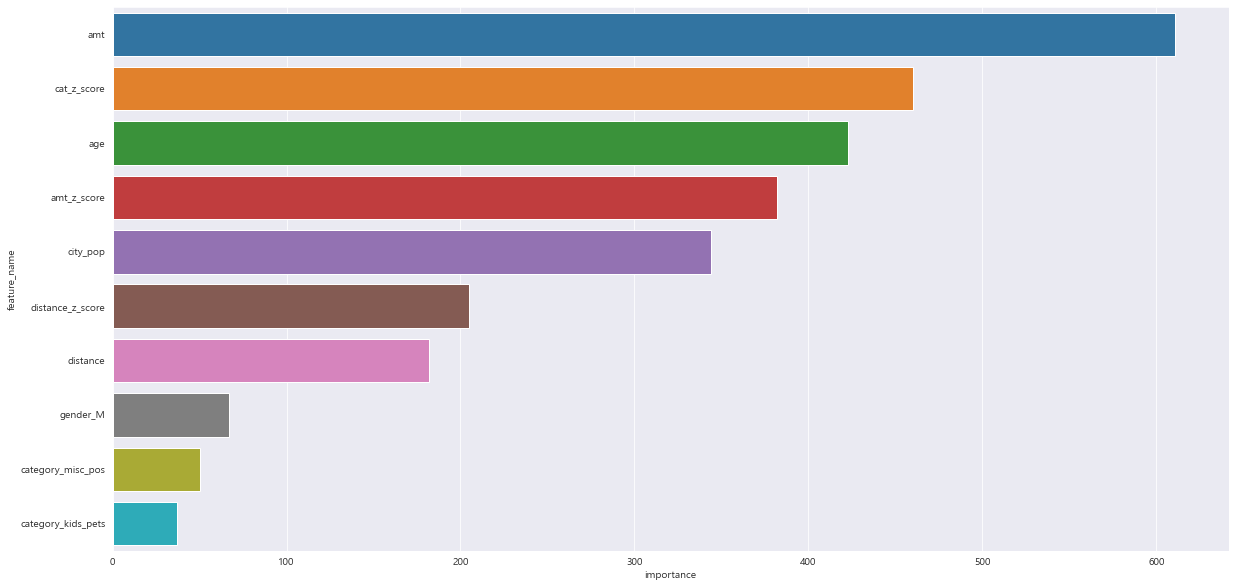

In [102]:
feature_imp = pd.DataFrame({'feature_name' : X_train.columns , 'importance' : model_1.feature_importances_}).sort_values('importance' , ascending = False) # 중요 변수 정리
plt.figure(figsize=(20, 10))
sns.barplot(x='importance' ,  y = 'feature_name' , data = feature_imp.head(10))
plt.show()

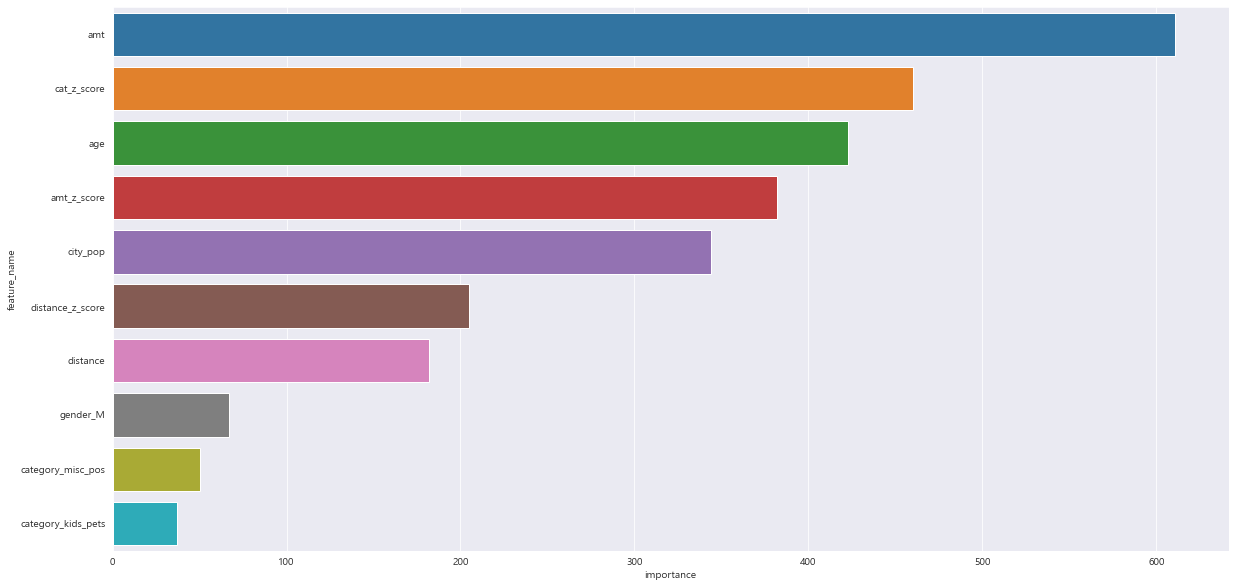

In [103]:
feature_imp_3 = pd.DataFrame(sorted(zip(model_3.feature_importance() , X_train.columns)) , columns = ['Value' , 'Feature']) # 중요 변수 정리
plt.figure(figsize=(20, 10))
sns.barplot(x='importance' ,  y = 'feature_name' , data = feature_imp.head(10))
plt.show()

In [6]:
data.drop(['first' , 'last' , 'street', 'city' , 'state' , 'zip' , 'trans_num' , 'unix_time' , 'job' , 'merchant'] , axis = 1 , inplace =True)

In [7]:
data['trans_date_trans_time']

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1852389    2020-12-31 23:59:07
1852390    2020-12-31 23:59:09
1852391    2020-12-31 23:59:15
1852392    2020-12-31 23:59:24
1852393    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [8]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time']) # 날짜 형식으로 변환

data['trans_date_trans_time']

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1852389   2020-12-31 23:59:07
1852390   2020-12-31 23:59:09
1852391   2020-12-31 23:59:15
1852392   2020-12-31 23:59:24
1852393   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: datetime64[ns]

In [9]:
data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0


In [10]:
data.groupby('cc_num').count()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
cc_num,,,,,,,,,,,
60416207185,2196,2196,2196,2196,2196,2196,2196,2196,2196,2196,2196
60422928733,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200
60423098130,738,738,738,738,738,738,738,738,738,738,738
60427851591,743,743,743,743,743,743,743,743,743,743,743
60487002085,735,735,735,735,735,735,735,735,735,735,735
...,...,...,...,...,...,...,...,...,...,...,...
4958589671582726883,2191,2191,2191,2191,2191,2191,2191,2191,2191,2191,2191
4973530368125489546,1467,1467,1467,1467,1467,1467,1467,1467,1467,1467,1467
4980323467523543940,736,736,736,736,736,736,736,736,736,736,736


In [11]:
amt_info = data.groupby('cc_num').agg(['mean' , 'std'])['amt'].reset_index() #cc_num별 amt 평균과 표준편차 계산

amt_info.head()

,cc_num,mean,std
0,60416207185,59.257796,142.869746
1,60422928733,65.483159,92.042844
2,60423098130,96.376084,1000.693872
3,60427851591,107.487550,131.014534
4,60487002085,64.096925,153.207660


In [12]:
data = data.merge(amt_info , on = 'cc_num' , how = 'left') # 데이터 합치기
data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,89.408743,127.530101
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,69.924272,116.688602
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,80.090040,280.077880
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,95.341146,94.322842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,62.347968,110.821153
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,50.452289,168.361122
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,88.704297,119.948793
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,60.998052,89.525640


In [13]:
data['amt_z_score'] = (data['amt'] - data['mean']) / data['std']  # z-score 계산

In [14]:
data[['amt' , 'mean' , 'std' , 'amt_z_score']].head()

,amt,mean,std,amt_z_score
0,4.97,89.408743,127.530101,-0.662108
1,107.23,56.078113,159.201852,0.321302
2,220.11,69.924272,116.688602,1.287064
3,45.00,80.090040,280.077880,-0.125287
4,41.96,95.341146,94.322842,-0.565941


In [15]:
data.drop(['mean' , 'std'] , axis = 1 , inplace =True)  # 변수 제거

In [16]:
data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,-0.167639
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,-0.592099


In [17]:
category_info = data.groupby(['cc_num' , 'category']).agg(['mean' , 'std'])['amt'].reset_index()

In [18]:
data = data.merge(category_info , on = ['cc_num' , 'category'] , how = 'left')

data['cat_z_score'] = (data['amt'] - data['mean']) / data['std']

data.drop(['mean' , 'std'] , axis = 1 , inplace =True)

data

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,-0.167639,-0.047862
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.364619,1.163822
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,-0.015209,0.440137
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,-0.592099,-0.007423


In [ ]:
import geopy